# Extração e Limpeza dos Dados 

**Autor:** Vinícius de Paula R Carvalho

**Data:** 07 de agosto de 2025

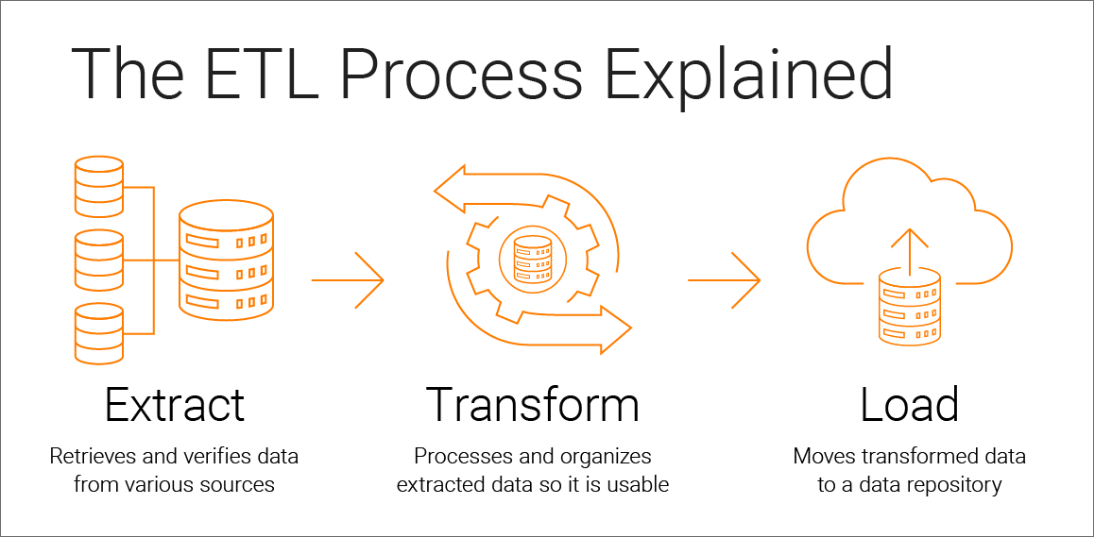

Este documento detalha os processamentos realizados no notebook `01_extracao_e_limpeza_de_dados.ipynb` no contexto do projeto de análise de dados de governadores brasileiros no Instagram. O script funciona como o ponto de partida e o principal orquestrador de todo o fluxo de dados, sendo indispensável para a viabilização de qualquer análise subsequente. O notebook atua como o controlador principal de um pipeline de Extração, Transformação e Carga (ETL). Suas ações principais são:

1.  **Configuração:** Carrega todas as configurações do projeto, como caminhos de arquivos (`config/settings.py`) e chaves de API secretas (`.env`).
2.  **Leitura da Fonte:** Lê o arquivo `governadores.xlsx` para obter a lista de perfis do Instagram que serão analisados.
3.  **Execução do Pipeline ELT:** Aciona a função `ELT` do módulo `src.data.ETL`, que realiza as seguintes etapas:
    * **Extração:** Conecta-se à API da Apify para extrair dados brutos de perfis, posts e reels. Crucialmente, esta etapa é condicional: ela só é executada se os arquivos de dados brutos (`.json`) ainda não existirem, economizando tempo e custos de API em execuções futuras.
    * **Transformação:** Processa os dados brutos, realizando limpeza, unificação de datasets (posts e reels) e engenharia de features, calculando métricas essenciais como `% ENGAJAMENTO`, `RECENCIA` e `FREQUENCIA`.
    * **Carga:** Salva todos os DataFrames transformados e limpos em um único arquivo Excel (`all.xlsx`) na pasta `data/processed`, com cada tabela em uma aba separada.

Este notebook deve ser **o primeiro script a ser executado em todo o projeto**. Ele é o passo inicial que constrói o dataset processado (`all.xlsx`), que servirá de base para todos os outros notebooks de análise exploratória, modelagem e visualização. Ele só precisa ser executado novamente caso a lista de governadores seja alterada ou se houver a necessidade de atualizar os dados brutos da API. A importância deste script é fundamental e multifacetada, pois ele garante a **fundação**, a **automação** e a **reprodutibilidade** de toda a análise.

O bloco de código a seguir é a primeira linha do script. Ele resolve um problema fundamental de organização de projetos: ele torna os módulos customizados do projeto (como src e config) "encontráveis" pelo Python, não importa de onde o notebook seja executado. Quando você trabalha em um notebook localizado dentro de uma subpasta como notebooks/, o Python, por padrão, só consegue enxergar os arquivos que estão nessa mesma pasta. Ele não tem conhecimento das outras pastas importantes, como src/ ou config/, que estão no diretório "acima". Este código resolve isso dinamicamente. Devido a esta característica, ele irá aparecer em todos os notebooks deste projeto.

Primeiro, ele descobre o caminho absoluto para a pasta raiz do projeto (navegando um nível acima do diretório atual do notebook); em seguida, ele adiciona esse caminho raiz à lista de locais onde o Python procura por módulos (sys.path). Ao fazer isso como a primeira ação, ele prepara o ambiente para que todas as importações subsequentes, como from src.data.ETL import ELT e from config import settings, funcionem perfeitamente, garantindo que o notebook seja autônomo e o projeto, robusto e portátil.

In [1]:
import sys
import os

# Adiciona o diretório raiz do projeto ao sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.data_extract.ETL import ELT
from config import settings
from dotenv import load_dotenv
import pandas as pd

# Esta função procura por um arquivo .env e carrega suas variáveis no ambiente
load_dotenv()

True

Na próxima linha de código, o script executa o coração de sua funcionalidade, agindo como o motor principal do notebook. Este bloco realiza uma sequência de quatro ações críticas e interdependentes: primeiro, ele carrega a lista inicial de perfis a serem analisados a partir de um arquivo Excel, utilizando um caminho centralizado e seguro definido no arquivo de configurações (settings.GOVERNADORES_FILE), o que garante flexibilidade e fácil manutenção. Em seguida, ele executa uma etapa de limpeza de dados essencial, removendo quaisquer espaços em branco extras dos nomes das colunas para prevenir erros de digitação e inconsistências. O terceiro passo é recuperar, de forma segura, a chave secreta da API da Apify que foi previamente carregada do arquivo .env, evitando a exposição de informações sensíveis diretamente no código. Finalmente, com todos os insumos prontos, ele aciona o pipeline ELT (Extração, Carga e Transformação), passando os três parâmetros necessários para sua execução: a chave da API, uma lista de links de perfis que foi cuidadosamente preparada (limpa de espaços e com apenas valores únicos para evitar duplicidade) e um limite de 30 resultados por perfil, orquestrando assim todo o fluxo de extração e processamento de dados do projeto.

In [2]:
df = pd.read_excel(settings.GOVERNADORES_FILE)
df.columns = df.columns.str.strip()
APIFY_API_TOKEN = os.getenv('APIFY_API_TOKEN')
ELT(APIFY_API_TOKEN, list(df['Link'].str.strip().unique()), results_limit=30) 

📁 [1/3] EXTRAÇÃO: Arquivos já existem. Pulando extração...
🔧 [2/3] TRANSFORMAÇÃO: Processando dados...
💾 [3/3] CARGA: Salvando arquivos processados...
✅ Pipeline ELT finalizado com sucesso!
📄 Arquivo salvo em: C:\Projetos\Tecnicas de NLP em dados do Instagram\data\processed\all.xlsx


A execução bem-sucedida do notebook `01_extracao_e_limpeza_de_dados.ipynb` marca a conclusão da fase mais crítica e fundamental do projeto. Com a finalização do pipeline de ETL, dispomos agora de um dataset consolidado, limpo e enriquecido com métricas de engajamento, salvo no arquivo `all.xlsx`. Este arquivo representa a "fonte da verdade" para todas as análises subsequentes, garantindo uma base de dados robusta e consistente.

Com a fundação de dados solidamente estabelecida, o projeto avança para as fases de análise e modelagem, que serão divididas nos seguintes notebooks:

1.  **`02_analise_exploratoria.ipynb` - Análise Exploratória de Dados (AED):** O próximo passo imediato será mergulhar nos dados para entender suas características e distribuições. Nesta fase, iremos responder perguntas como: Qual governador possui maior engajamento? Qual a frequência e recência média das postagens? Existem correlações entre o número de seguidores e as taxas de engajamento? Serão geradas visualizações, como histogramas, box plots e nuvens de palavras, para extrair os primeiros insights e identificar padrões.

2.  **`03_modelagem_nlp.ipynb` - Aplicação de Técnicas de NLP:** Após a análise exploratória, utilizaremos o poder do Processamento de Linguagem Natural para analisar o conteúdo textual das postagens. O objetivo é aplicar modelos para realizar análise de sentimentos (classificar os comentários e posts como positivos, negativos ou neutros), modelagem de tópicos (identificar os principais temas abordados por cada governador) e reconhecimento de entidades nomeadas (extrair nomes de pessoas, locais e organizações citados).

3.  **`04_visualizacao_e_conclusoes.ipynb` - Síntese e Relatório Final:** Por fim, os resultados da análise exploratória e da modelagem de NLP serão consolidados. Nesta etapa, criaremos um relatório final ou um dashboard interativo para apresentar as conclusões do projeto de forma clara e impactante, respondendo às perguntas de negócio que motivaram a análise.

A conclusão bem-sucedida desta primeira etapa nos posiciona de forma ideal para extrair insights valiosos e aprofundados sobre as estratégias de comunicação digital dos governadores, transformando dados brutos em conhecimento acionável.